# U-Net Model for Image Segmentation with Monte Carlo Training on Random Integers

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import random
import os

# Set seeds for reproducibility
def set_seed(seed=42):
    np.random.seed(seed)
    random.seed(seed)
    tf.random.set_seed(seed)

# Define the U-Net model
def unet_model(input_shape=(256, 256, 1)):
    inputs = keras.Input(shape=input_shape)

    # Contracting Path
    c1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    c1 = layers.BatchNormalization()(c1)
    c1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(c1)
    c1 = layers.BatchNormalization()(c1)
    p1 = layers.MaxPooling2D((2, 2))(c1)

    c2 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(p1)
    c2 = layers.BatchNormalization()(c2)
    c2 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(c2)
    c2 = layers.BatchNormalization()(c2)
    p2 = layers.MaxPooling2D((2, 2))(c2)

    # Bottleneck
    c3 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(p2)
    c3 = layers.BatchNormalization()(c3)
    c3 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(c3)
    c3 = layers.BatchNormalization()(c3)

    # Expanding Path
    u1 = layers.UpSampling2D((2, 2))(c3)
    u1 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(u1)
    u1 = layers.BatchNormalization()(u1)
    u1 = layers.Concatenate()([u1, c2])

    u2 = layers.UpSampling2D((2, 2))(u1)
    u2 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(u2)
    u2 = layers.BatchNormalization()(u2)
    u2 = layers.Concatenate()([u2, c1])

    outputs = layers.Conv2D(1, (1, 1), activation='sigmoid')(u2)

    model = keras.Model(inputs, outputs)
    return model

# Dice Similarity Coefficient (DSC) Loss
def dice_coefficient(y_true, y_pred, smooth=1):
    y_true_f = tf.keras.backend.flatten(tf.cast(y_true, tf.float32))  # Convert to float32
    y_pred_f = tf.keras.backend.flatten(y_pred)
    intersection = tf.keras.backend.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (tf.keras.backend.sum(y_true_f) + tf.keras.backend.sum(y_pred_f) + smooth)


# Compile the model
def compile_model():
    model = unet_model()
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[dice_coefficient])
    return model

# Perform Monte Carlo training runs
def monte_carlo_training(data, labels, runs=10):
    results = []
    for i in range(runs):
        print(f"Monte Carlo Run {i+1}/{runs}")
        set_seed(i)
        model = compile_model()
        history = model.fit(data, labels, epochs=5, batch_size=8, validation_split=0.2, verbose=1)
        results.append(history.history['val_dice_coefficient'][-1])
    return results

# Placeholder for data loading
def load_data():
    # This should be replaced with actual DCE-MRI dataset loading
    data = np.random.rand(100, 256, 256, 1)  # Dummy data
    labels = np.random.randint(0, 2, (100, 256, 256, 1))  # Dummy labels
    return data, labels

# Main execution
data, labels = load_data()
monte_carlo_results = monte_carlo_training(data, labels, runs=10)
print("Monte Carlo DSC Scores:", monte_carlo_results)


Monte Carlo Run 1/10
Epoch 1/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 63s 3s/step - dice_coefficient: 0.5005 - loss: 0.8342 - val_dice_coefficient: 0.4978 - val_loss: 0.6932
Epoch 2/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 28s 281ms/step - dice_coefficient: 0.5009 - loss: 0.7294 - val_dice_coefficient: 0.5082 - val_loss: 0.6938
Epoch 3/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 281ms/step - dice_coefficient: 0.5012 - loss: 0.7057 - val_dice_coefficient: 0.5195 - val_loss: 0.6966
Epoch 4/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 282ms/step - dice_coefficient: 0.5013 - loss: 0.6996 - val_dice_coefficient: 0.5282 - val_loss: 0.7006
Epoch 5/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 280ms/step - dice_coefficient: 0.5012 - loss: 0.6972 - val_dice_coefficient: 0.5349 - val_loss: 0.7050
Monte Carlo Run 2/10
Epoch 1/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 17s 466ms/step - dice_coefficient: 0.5006 - loss: 0.8203 - val_dice_coefficient: 0.5036 - val_loss: 0.6933
Epoch 2/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 289ms/step - dice_coefficient: 0.5012 - loss: 0.7179 - val_d



---



# Brain Tumor Classification

Training set shape: (4569, 256, 256, 1) (4569,)
Validation set shape: (1143, 256, 256, 1) (1143,)
Testing set shape: (1311, 256, 256, 1) (1311,)
Epoch 1/25
572/572 ━━━━━━━━━━━━━━━━━━━━ 19s 28ms/step - accuracy: 0.6512 - loss: 0.8442 - val_accuracy: 0.8548 - val_loss: 0.4204
Epoch 2/25
572/572 ━━━━━━━━━━━━━━━━━━━━ 12s 21ms/step - accuracy: 0.8673 - loss: 0.3378 - val_accuracy: 0.8434 - val_loss: 0.4087
Epoch 3/25
572/572 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.9290 - loss: 0.1954 - val_accuracy: 0.8985 - val_loss: 0.2972
Epoch 4/25
572/572 ━━━━━━━━━━━━━━━━━━━━ 12s 21ms/step - accuracy: 0.9523 - loss: 0.1244 - val_accuracy: 0.9073 - val_loss: 0.2730
Epoch 5/25
572/572 ━━━━━━━━━━━━━━━━━━━━ 12s 20ms/step - accuracy: 0.9691 - loss: 0.0816 - val_accuracy: 0.9046 - val_loss: 0.3096
Epoch 6/25
572/572 ━━━━━━━━━━━━━━━━━━━━ 12s 21ms/step - accuracy: 0.9726 - loss: 0.0819 - val_accuracy: 0.9221 - val_loss: 0.3397
Epoch 7/25
572/572 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.9778 - 

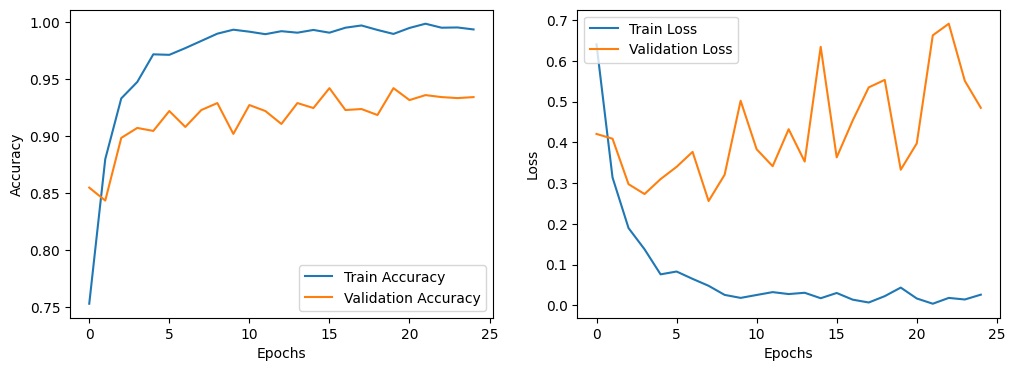

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step


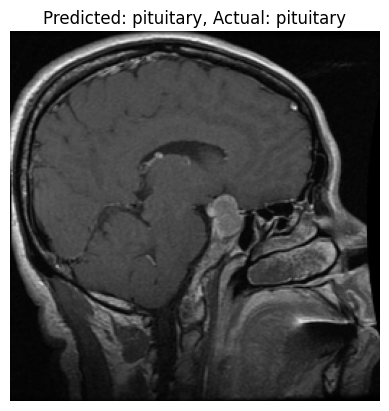

In [ ]:
# Import necessary libraries
import os
import numpy as np
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

# === STEP 2: LOAD AND PREPROCESS DATA ===
# Define paths
train_dir = "/content/brain-tumor-mri-dataset/Training"
test_dir = "/content/brain-tumor-mri-dataset/Testing"

# Image size and categories
IMG_SIZE = (256, 256)
categories = os.listdir(train_dir)  # ['glioma_tumor', 'meningioma_tumor', 'pituitary_tumor', 'no_tumor']
num_classes = len(categories)

# Function to load images and labels
def load_images_from_directory(directory):
    images, labels = [], []

    for category in categories:
        label = categories.index(category)  # Convert category name to numerical label
        category_path = os.path.join(directory, category)

        for img_name in os.listdir(category_path):
            img_path = os.path.join(category_path, img_name)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Load in grayscale
            img = cv2.resize(img, IMG_SIZE)  # Resize

            images.append(img)
            labels.append(label)

    images = np.array(images).reshape(-1, 256, 256, 1) / 255.0  # Normalize (0 to 1) and reshape
    labels = np.array(labels)

    return images, labels

# Load training and testing data
X_train, y_train = load_images_from_directory(train_dir)
X_test, y_test = load_images_from_directory(test_dir)

# Split training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Print dataset shapes
print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

# === STEP 3: BUILD CNN CLASSIFICATION MODEL ===
def build_model(input_shape=(256, 256, 1), num_classes=4):
    inputs = keras.Input(shape=input_shape)

    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D((2, 2))(x)

    x = layers.Flatten()(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dropout(0.3)(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)  # Softmax for multi-class classification

    model = keras.Model(inputs, outputs)
    return model

# Compile Model
model = build_model()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# === STEP 4: TRAIN THE MODEL ===
history = model.fit(X_train, y_train, epochs=25, batch_size=8, validation_data=(X_val, y_val))

# === STEP 5: EVALUATE ON TEST SET ===
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

# === STEP 6: PLOT TRAINING HISTORY ===
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# === STEP 7: MAKE PREDICTIONS ===
def predict_sample(image_idx):
    image = X_test[image_idx].reshape(1, 256, 256, 1)  # Reshape for prediction
    pred = model.predict(image)
    predicted_class = np.argmax(pred)

    plt.imshow(X_test[image_idx].reshape(256, 256), cmap='gray')
    plt.title(f"Predicted: {categories[predicted_class]}, Actual: {categories[y_test[image_idx]]}")
    plt.axis("off")
    plt.show()

# Test prediction on random image
predict_sample(np.random.randint(0, len(X_test)))


In [ ]:
!pip install opendatasets

In [ ]:
import opendatasets as od
import pandas

od.download("https://www.kaggle.com/datasets/thedevastator/cancer-patients-and-air-pollution-a-new-link/data")


Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: jugalmodipesurr
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/thedevastator/cancer-patients-and-air-pollution-a-new-link


100%|██████████| 7.36k/7.36k [00:00<00:00, 6.49MB/s]



---



# On Breast Cancer Datasets





Training set shape: (398, 6, 6, 1) (398,)
Validation set shape: (85, 6, 6, 1) (85,)
Testing set shape: (86, 6, 6, 1) (86,)
Epoch 1/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 6s 53ms/step - accuracy: 0.8413 - loss: 0.4146 - val_accuracy: 0.9647 - val_loss: 0.1030
Epoch 2/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9226 - loss: 0.1892 - val_accuracy: 0.9529 - val_loss: 0.1365
Epoch 3/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9657 - loss: 0.0801 - val_accuracy: 0.9412 - val_loss: 0.1172
Epoch 4/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9880 - loss: 0.0444 - val_accuracy: 0.9412 - val_loss: 0.1650
Epoch 5/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9953 - loss: 0.0164 - val_accuracy: 0.9412 - val_loss: 0.1741
Epoch 6/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9926 - loss: 0.0247 - val_accuracy: 0.9529 - val_loss: 0.1046
Epoch 7/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9742 - loss: 0.0798 - val_accuracy: 0.9412 - val_loss: 0

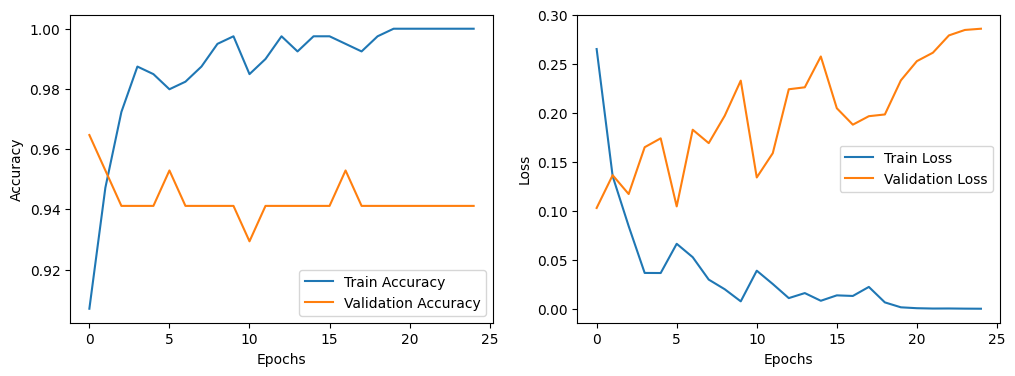

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 375ms/step


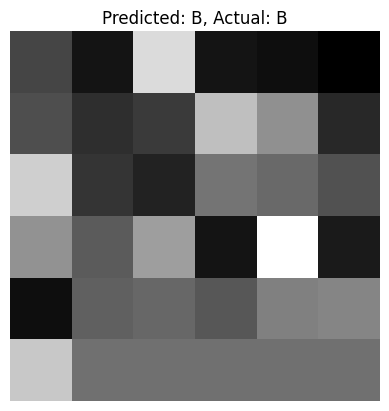

In [ ]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# === STEP 1: LOAD DATA FROM CSV ===
data_path = "/content/breast-cancer-dataset/breast-cancer.csv"  # Change to actual CSV path
data = pd.read_csv(data_path)

# Assume the dataset has a 'label' column and feature columns
labels = data['diagnosis'].values  # Extract labels using the correct column name 'diagnosis'
features = data.drop(columns=['diagnosis']).values  # Drop label column to get features

# Normalize features
scaler = StandardScaler()
features = scaler.fit_transform(features)

# Reshape features to match CNN input (assuming single-channel input)
n_samples, n_features = features.shape

# Calculate img_size based on the closest perfect square to n_features
img_size = int(np.ceil(np.sqrt(n_features)))  # Round up to the nearest integer

# Pad features to make it a perfect square if needed
padding_size = img_size * img_size - n_features
if padding_size > 0:
    padding = np.zeros((n_samples, padding_size))
    features = np.concatenate([features, padding], axis=1)

features = features.reshape(n_samples, img_size, img_size, 1)  # Reshape to 2D image format

# Encode labels
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)
n_classes = len(label_encoder.classes_)

# Split dataset into training, validation, and testing
X_train, X_temp, y_train, y_temp = train_test_split(features, labels, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

# === STEP 2: BUILD CNN CLASSIFICATION MODEL ===
def build_model(input_shape=(img_size, img_size, 1), num_classes=n_classes):
    inputs = keras.Input(shape=input_shape)

    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    # Remove or comment out one or two of the MaxPooling2D layers
    #x = layers.MaxPooling2D((2, 2))(x)  # Commented out
    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    #x = layers.MaxPooling2D((2, 2))(x)  # Commented out

    x = layers.Flatten()(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dropout(0.3)(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)  # Softmax for multi-class classification

    model = keras.Model(inputs, outputs)
    return model

# Compile Model
model = build_model()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# === STEP 3: TRAIN THE MODEL ===
history = model.fit(X_train, y_train, epochs=25, batch_size=8, validation_data=(X_val, y_val))

# === STEP 4: EVALUATE ON TEST SET ===
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

# === STEP 5: PLOT TRAINING HISTORY ===
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# === STEP 6: MAKE PREDICTIONS ===
def predict_sample(image_idx):
    image = X_test[image_idx].reshape(1, img_size, img_size, 1)  # Reshape for prediction
    pred = model.predict(image)
    predicted_class = np.argmax(pred)

    plt.imshow(X_test[image_idx].reshape(img_size, img_size), cmap='gray')
    plt.title(f"Predicted: {label_encoder.classes_[predicted_class]}, Actual: {label_encoder.classes_[y_test[image_idx]]}")
    plt.axis("off")
    plt.show()

# Test prediction on random sample
predict_sample(np.random.randint(0, len(X_test)))




---


# On Lung Cancer Datasets

Training set shape: (700, 5, 5, 1) (700,)
Validation set shape: (150, 5, 5, 1) (150,)
Testing set shape: (150, 5, 5, 1) (150,)
Epoch 1/5
88/88 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - accuracy: 0.7865 - loss: 0.5594 - val_accuracy: 0.9867 - val_loss: 0.0695
Epoch 2/5
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9897 - loss: 0.0396 - val_accuracy: 1.0000 - val_loss: 0.0031
Epoch 3/5
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 1.0000 - loss: 0.0043 - val_accuracy: 1.0000 - val_loss: 4.4931e-04
Epoch 4/5
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 6.7173e-04 - val_accuracy: 1.0000 - val_loss: 2.5921e-04
Epoch 5/5
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 1.0000 - loss: 2.9458e-04 - val_accuracy: 1.0000 - val_loss: 1.2855e-04
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - accuracy: 1.0000 - loss: 1.5844e-04
Test Accuracy: 1.0000


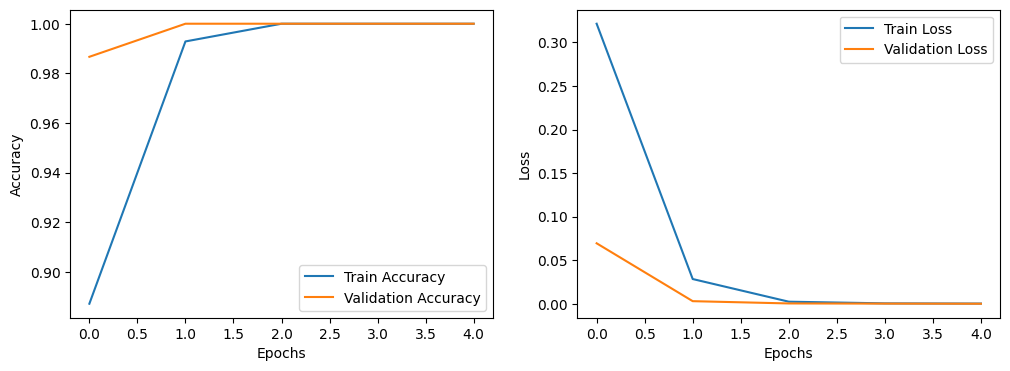

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step


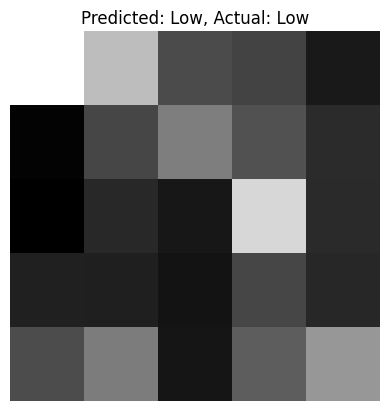

In [ ]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# === STEP 1: LOAD DATA FROM CSV ===
data_path = "/content/cancer-patients-and-air-pollution-a-new-link/cancer patient data sets.csv"  # Change to actual CSV path
data = pd.read_csv(data_path)

# Assume the dataset has a 'label' column and feature columns
# Extract labels using the correct column name 'Level'
labels = data['Level'].values
# Drop unnecessary columns for features
features = data.drop(columns=['Level', 'Patient Id']).values
# Normalize features
scaler = StandardScaler()
features = scaler.fit_transform(features)

# Reshape features to match CNN input (assuming single-channel input)
n_samples, n_features = features.shape

# Calculate img_size based on the closest perfect square to n_features
img_size = int(np.ceil(np.sqrt(n_features)))  # Round up to the nearest integer

# Pad features to make it a perfect square if needed
padding_size = img_size * img_size - n_features
if padding_size > 0:
    padding = np.zeros((n_samples, padding_size))
    features = np.concatenate([features, padding], axis=1)

features = features.reshape(n_samples, img_size, img_size, 1)  # Reshape to 2D image format

# Encode labels
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)
n_classes = len(label_encoder.classes_)

# Split dataset into training, validation, and testing
X_train, X_temp, y_train, y_temp = train_test_split(features, labels, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

# === STEP 2: BUILD CNN CLASSIFICATION MODEL ===
def build_model(input_shape=(img_size, img_size, 1), num_classes=n_classes):
    inputs = keras.Input(shape=input_shape)

    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    # Remove or comment out one or two of the MaxPooling2D layers
    #x = layers.MaxPooling2D((2, 2))(x)  # Commented out
    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    #x = layers.MaxPooling2D((2, 2))(x)  # Commented out

    x = layers.Flatten()(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dropout(0.3)(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)  # Softmax for multi-class classification

    model = keras.Model(inputs, outputs)
    return model

# Compile Model
model = build_model()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# === STEP 3: TRAIN THE MODEL ===
history = model.fit(X_train, y_train, epochs=5, batch_size=8, validation_data=(X_val, y_val))

# === STEP 4: EVALUATE ON TEST SET ===
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

# === STEP 5: PLOT TRAINING HISTORY ===
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# === STEP 6: MAKE PREDICTIONS ===
def predict_sample(image_idx):
    image = X_test[image_idx].reshape(1, img_size, img_size, 1)  # Reshape for prediction
    pred = model.predict(image)
    predicted_class = np.argmax(pred)

    plt.imshow(X_test[image_idx].reshape(img_size, img_size), cmap='gray')
    plt.title(f"Predicted: {label_encoder.classes_[predicted_class]}, Actual: {label_encoder.classes_[y_test[image_idx]]}")
    plt.axis("off")
    plt.show()

# Test prediction on random sample
predict_sample(np.random.randint(0, len(X_test)))